In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import PowerTransformer


In [2]:
data=pd.read_csv(r'train_dK8Auve.csv')

In [3]:
data.Office_PIN.nunique()

98

In [4]:
data=data.drop('ID',axis=1)

In [5]:
data

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,160017,7/1/2008,160032.0,M,1/18/1970,M,Salaried,Graduate,5/5/2008,Level 2,...,Probation,M,5/10/1967,0.0,0.0,0.0,0.0,0.0,0.0,0
9523,848101,7/1/2008,848302.0,M,9/11/1956,M,NaN,Graduate,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9524,753012,7/1/2008,753014.0,F,8/7/1975,M,Salaried,Graduate,8/22/2006,Level 2,...,Confirmation,M,7/22/1970,0.0,0.0,316126.0,9.0,305775.0,8.0,0
9525,575003,7/1/2008,571248.0,M,12/23/1986,S,Salaried,Class XII,6/5/2008,Level 3,...,Probation,M,9/23/1976,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
data['Application_Receipt_Date'] = pd.to_datetime(data['Application_Receipt_Date'], format =  '%m/%d/%Y')
data['Applicant_BirthDate'] = pd.to_datetime(data['Applicant_BirthDate'], format =  '%m/%d/%Y')
data['Manager_DoB'] = pd.to_datetime(data['Manager_DoB'], format =  '%m/%d/%Y')
data['Manager_DOJ'] = pd.to_datetime(data['Manager_DOJ'], format =  '%m/%d/%Y')

In [8]:
data['Application_Receipt_Date_year'] = data['Application_Receipt_Date'].dt.year
data['Application_Receipt_Date_month'] = data['Application_Receipt_Date'].dt.month

data['Application_Receipt_Date_day'] = data['Application_Receipt_Date'].dt.day
data['Applicant_BirthDate_year'] = data['Applicant_BirthDate'].dt.year
data['Applicant_BirthDate_month'] = data['Applicant_BirthDate'].dt.month

data['Applicant_BirthDate_day'] = data['Applicant_BirthDate'].dt.day



In [9]:
import datetime as dt

#data['Manager_age'] = (np.floor((pd.to_datetime(data['Manager_DoB']) - pd.to_datetime(data['Manager_DOJ'])).dt.days / 365.25)).astype(int)
data['Manager_age']=abs(data['Manager_DoB'].dt.year - data['Manager_DOJ'].dt.year)


In [10]:
data=data.drop(columns=['Application_Receipt_Date','Applicant_BirthDate','Manager_DoB','Manager_DOJ'])

In [11]:
data

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,...,Manager_Business2,Manager_Num_Products2,Business_Sourced,Application_Receipt_Date_year,Application_Receipt_Date_month,Application_Receipt_Date_day,Applicant_BirthDate_year,Applicant_BirthDate_month,Applicant_BirthDate_day,Manager_age
0,842001,844120.0,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,...,335249.0,28.0,0,2007,4,16,1971.0,12.0,19.0,27.0
1,842001,844111.0,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,...,335249.0,28.0,1,2007,4,16,1983.0,2.0,17.0,27.0
2,800001,844101.0,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,...,357184.0,24.0,0,2007,4,16,1966.0,1.0,16.0,37.0
3,814112,814112.0,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,...,318356.0,22.0,0,2007,4,16,1988.0,2.0,3.0,25.0
4,814112,815351.0,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,...,230402.0,17.0,0,2007,4,16,1985.0,7.0,4.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,160017,160032.0,M,M,Salaried,Graduate,Level 2,Level 2,3.0,Probation,...,0.0,0.0,0,2008,7,1,1970.0,1.0,18.0,41.0
9523,848101,848302.0,M,M,NaN,Graduate,NaN,NaN,NaN,NaN,...,NaN,NaN,0,2008,7,1,1956.0,9.0,11.0,NaN
9524,753012,753014.0,F,M,Salaried,Graduate,Level 2,Level 2,3.0,Confirmation,...,305775.0,8.0,0,2008,7,1,1975.0,8.0,7.0,36.0
9525,575003,571248.0,M,S,Salaried,Class XII,Level 3,Level 3,4.0,Probation,...,0.0,0.0,0,2008,7,1,1986.0,12.0,23.0,32.0


In [12]:
data.columns

Index(['Office_PIN', 'Applicant_City_PIN', 'Applicant_Gender',
       'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced',
       'Application_Receipt_Date_year', 'Application_Receipt_Date_month',
       'Application_Receipt_Date_day', 'Applicant_BirthDate_year',
       'Applicant_BirthDate_month', 'Applicant_BirthDate_day', 'Manager_age'],
      dtype='object')

In [13]:
data1=data.dropna(how='any')

In [14]:
data1

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,...,Manager_Business2,Manager_Num_Products2,Business_Sourced,Application_Receipt_Date_year,Application_Receipt_Date_month,Application_Receipt_Date_day,Applicant_BirthDate_year,Applicant_BirthDate_month,Applicant_BirthDate_day,Manager_age
0,842001,844120.0,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,...,335249.0,28.0,0,2007,4,16,1971.0,12.0,19.0,27.0
1,842001,844111.0,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,...,335249.0,28.0,1,2007,4,16,1983.0,2.0,17.0,27.0
2,800001,844101.0,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,...,357184.0,24.0,0,2007,4,16,1966.0,1.0,16.0,37.0
3,814112,814112.0,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,...,318356.0,22.0,0,2007,4,16,1988.0,2.0,3.0,25.0
4,814112,815351.0,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,...,230402.0,17.0,0,2007,4,16,1985.0,7.0,4.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,800001,844121.0,M,M,Salaried,Graduate,Level 2,Level 2,3.0,Probation,...,0.0,0.0,1,2008,7,1,1968.0,10.0,11.0,37.0
9516,800001,844101.0,M,M,Salaried,Graduate,Level 2,Level 2,3.0,Probation,...,0.0,0.0,0,2008,7,1,1975.0,3.0,3.0,37.0
9522,160017,160032.0,M,M,Salaried,Graduate,Level 2,Level 2,3.0,Probation,...,0.0,0.0,0,2008,7,1,1970.0,1.0,18.0,41.0
9524,753012,753014.0,F,M,Salaried,Graduate,Level 2,Level 2,3.0,Confirmation,...,305775.0,8.0,0,2008,7,1,1975.0,8.0,7.0,36.0


In [15]:
target=data1['Business_Sourced']

In [16]:
num=data1[['Manager_Business','Manager_Num_Products','Manager_Business2','Manager_Num_Products2','Application_Receipt_Date_year','Application_Receipt_Date_month','Application_Receipt_Date_day','Applicant_BirthDate_year','Applicant_BirthDate_month','Applicant_BirthDate_day','Manager_age']]

In [17]:
label=data1[['Office_PIN','Applicant_City_PIN','Manager_Grade','Manager_Num_Coded','Manager_Num_Application','Manager_Current_Designation']]

In [18]:
from sklearn import preprocessing
label_encode=label.apply(LabelEncoder().fit_transform)

In [19]:
label_encode.shape

(7730, 6)

In [72]:
one_hot=data1[['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Manager_Status','Manager_Gender']]

In [73]:
enc = pd.get_dummies(one_hot,drop_first=True)

In [74]:
enc.shape

(7730, 10)

In [75]:
data_s=pd.concat([label_encode,enc,num],axis=1)

In [76]:
data_s

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Coded,Manager_Num_Application,Manager_Current_Designation,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,...,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Application_Receipt_Date_year,Application_Receipt_Date_month,Application_Receipt_Date_day,Applicant_BirthDate_year,Applicant_BirthDate_month,Applicant_BirthDate_day,Manager_age
0,94,2612,2,1,2,1,1,1,0,0,...,28.0,335249.0,28.0,2007,4,16,1971.0,12.0,19.0,27.0
1,94,2605,2,1,2,1,1,0,1,0,...,28.0,335249.0,28.0,2007,4,16,1983.0,2.0,17.0,27.0
2,83,2603,1,0,0,0,1,1,0,0,...,24.0,357184.0,24.0,2007,4,16,1966.0,1.0,16.0,37.0
3,88,2443,3,0,0,2,1,0,1,0,...,22.0,318356.0,22.0,2007,4,16,1988.0,2.0,3.0,25.0
4,88,2458,1,1,2,0,1,1,0,0,...,17.0,230402.0,17.0,2007,4,16,1985.0,7.0,4.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,83,2613,2,0,0,1,1,1,0,0,...,0.0,0.0,0.0,2008,7,1,1968.0,10.0,11.0,37.0
9516,83,2603,2,0,0,1,1,1,0,0,...,0.0,0.0,0.0,2008,7,1,1975.0,3.0,3.0,37.0
9522,9,161,2,0,0,1,1,1,0,0,...,0.0,0.0,0.0,2008,7,1,1970.0,1.0,18.0,41.0
9524,81,2232,2,0,0,1,0,1,0,0,...,9.0,305775.0,8.0,2008,7,1,1975.0,8.0,7.0,36.0


In [77]:
scaler= StandardScaler()
x=scaler.fit_transform(data_s)
x

array([[ 1.61597931,  1.71741728, -0.22675219, ...,  1.74747652,
         0.64615961, -1.00327448],
       [ 1.61597931,  1.70878857, -0.22675219, ..., -1.20857948,
         0.41218309, -1.00327448],
       [ 1.22712942,  1.70632322, -1.10932742, ..., -1.50418508,
         0.29519483,  0.63166001],
       ...,
       [-1.38876988, -1.30386425, -0.22675219, ..., -1.50418508,
         0.52917135,  1.2856338 ],
       [ 1.15642944,  1.24900154, -0.22675219, ...,  0.56505412,
        -0.75769952,  0.46816656],
       [ 0.66152957,  0.5155611 ,  0.65582305, ...,  1.74747652,
         1.11411265, -0.18580724]])

In [78]:
x.shape

(7730, 27)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state=0)

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',class_weight='balanced')


In [81]:
type(target)

pandas.core.series.Series

In [82]:
log=logreg.fit(X_train, y_train)

In [83]:
log

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
y_pred = log.predict(X_test)

In [85]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


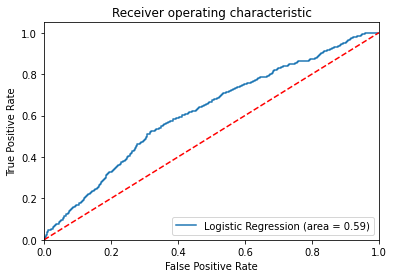

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test),average='weighted')
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [87]:
from sklearn import svm
clf = svm.SVC(probability=True,class_weight='balanced')
clf.fit(X_train , y_train)
# sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
# sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = clf.predict(X_test)

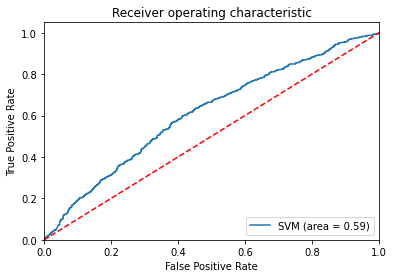

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [89]:
testdata=pd.read_csv(r'test_UyrvqPb.csv')

In [90]:
testdata.shape

(5045, 22)

In [91]:
testdata=testdata.dropna(how='any')

In [92]:
testdata['Application_Receipt_Date'] = pd.to_datetime(testdata['Application_Receipt_Date'], format =  '%m/%d/%Y')
testdata['Applicant_BirthDate'] = pd.to_datetime(testdata['Applicant_BirthDate'], format =  '%m/%d/%Y')
testdata['Manager_DoB'] = pd.to_datetime(testdata['Manager_DoB'], format =  '%m/%d/%Y')
testdata['Manager_DOJ'] = pd.to_datetime(testdata['Manager_DOJ'], format =  '%m/%d/%Y')

In [93]:
testdata['Application_Receipt_Date_year'] = testdata['Application_Receipt_Date'].dt.year
testdata['Application_Receipt_Date_month'] = testdata['Application_Receipt_Date'].dt.month

testdata['Application_Receipt_Date_day'] = testdata['Application_Receipt_Date'].dt.day
testdata['Applicant_BirthDate_year'] = testdata['Applicant_BirthDate'].dt.year
testdata['Applicant_BirthDate_month'] = testdata['Applicant_BirthDate'].dt.month

testdata['Applicant_BirthDate_day'] = testdata['Applicant_BirthDate'].dt.day


In [94]:
import datetime as dt

#data['Manager_age'] = (np.floor((pd.to_datetime(data['Manager_DoB']) - pd.to_datetime(data['Manager_DOJ'])).dt.days / 365.25)).astype(int)
testdata['Manager_age']=abs(testdata['Manager_DoB'].dt.year - testdata['Manager_DOJ'].dt.year)


In [95]:
testdata=testdata.drop(columns=['Application_Receipt_Date','Applicant_BirthDate','Manager_DoB','Manager_DOJ'])

In [96]:
test_num=testdata[['Manager_Business','Manager_Num_Products','Manager_Business2','Manager_Num_Products2','Application_Receipt_Date_year','Application_Receipt_Date_month','Application_Receipt_Date_day','Applicant_BirthDate_year','Applicant_BirthDate_month','Applicant_BirthDate_day','Manager_age']]

In [97]:
test_label=testdata[['Office_PIN','Applicant_City_PIN','Manager_Grade','Manager_Num_Coded','Manager_Num_Application','Manager_Current_Designation']]

In [98]:
from sklearn import preprocessing
test_label_encode=test_label.apply(LabelEncoder().fit_transform)

In [99]:
test_label_encode.shape

(3383, 6)

In [100]:
test_one_hot=testdata[['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Manager_Status','Manager_Gender']]

In [101]:
test_enc = pd.get_dummies(test_one_hot,drop_first=True)

In [102]:
test_enc.columns


Index(['Applicant_Gender_M', 'Applicant_Marital_Status_M',
       'Applicant_Marital_Status_S', 'Applicant_Marital_Status_W',
       'Applicant_Occupation_Others', 'Applicant_Occupation_Salaried',
       'Applicant_Occupation_Self Employed', 'Applicant_Occupation_Student',
       'Manager_Status_Probation', 'Manager_Gender_M'],
      dtype='object')

In [103]:
enc.columns

Index(['Applicant_Gender_M', 'Applicant_Marital_Status_M',
       'Applicant_Marital_Status_S', 'Applicant_Marital_Status_W',
       'Applicant_Occupation_Others', 'Applicant_Occupation_Salaried',
       'Applicant_Occupation_Self Employed', 'Applicant_Occupation_Student',
       'Manager_Status_Probation', 'Manager_Gender_M'],
      dtype='object')

In [104]:
data_t=pd.concat([test_label_encode,test_enc,test_num],axis=1)

In [105]:
data_t

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Coded,Manager_Num_Application,Manager_Current_Designation,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,...,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Application_Receipt_Date_year,Application_Receipt_Date_month,Application_Receipt_Date_day,Applicant_BirthDate_year,Applicant_BirthDate_month,Applicant_BirthDate_day,Manager_age
0,28,463,0,0,1,0,1,0,1,0,...,0.0,0.0,0.0,2008,7,2,1982,8,5,30
1,71,1432,0,0,2,0,1,1,0,0,...,0.0,0.0,0.0,2008,7,2,1968,3,11,37
7,56,1013,1,2,5,1,1,0,1,0,...,4.0,150721.0,4.0,2008,7,2,1980,3,15,30
8,56,1020,1,2,6,1,1,1,0,0,...,2.0,51988.0,2.0,2008,7,2,1973,6,26,38
13,9,162,2,2,4,2,1,1,0,0,...,0.0,0.0,0.0,2008,7,3,1953,7,7,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,33,522,2,0,0,2,1,1,0,0,...,0.0,0.0,0.0,2009,1,1,1971,4,14,24
5039,33,598,2,0,2,2,0,1,0,0,...,0.0,0.0,0.0,2009,1,1,1975,7,5,37
5040,63,1218,1,0,0,1,0,1,0,0,...,0.0,0.0,0.0,2009,1,1,1966,5,21,30
5041,63,1218,1,0,0,1,1,1,0,0,...,0.0,0.0,0.0,2009,1,1,1949,12,2,30


In [106]:
scaler= StandardScaler()
xx=scaler.fit_transform(data_t)
xx

array([[-0.46121357, -0.54935942, -1.38205788, ...,  0.53768811,
        -1.01359616, -0.50279874],
       [ 1.35611881,  1.51025351, -1.38205788, ..., -0.95795313,
        -0.31897531,  0.78497726],
       [ 0.72216566,  0.61966753, -0.36498113, ..., -0.95795313,
         0.14410525, -0.50279874],
       ...,
       [ 1.01801046,  1.05539576, -0.36498113, ..., -0.35969664,
         0.8387261 , -0.50279874],
       [ 1.01801046,  1.05539576, -0.36498113, ...,  1.73420111,
        -1.36090659, -0.50279874],
       [ 1.01801046,  1.03201522, -0.36498113, ..., -0.35969664,
         0.72295596, -0.50279874]])

In [107]:
xx.shape

(3383, 27)

In [108]:
y_pred = log.predict(xx)

In [109]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [111]:
final_data=pd.DataFrame()
final_data['ID']=testdata['ID']
final_data['Business_Sourced']=y_pred
final_data

,ID,Business_Sourced
0,FIN1009528,0
1,FIN1009529,0
7,FIN1009535,0
8,FIN1009536,1
13,FIN1009541,1
...,...,...
5038,FIN1014566,0
5039,FIN1014567,1
5040,FIN1014568,1
5041,FIN1014569,1


In [113]:
final_data.to_csv('output.csv',index=None)